In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

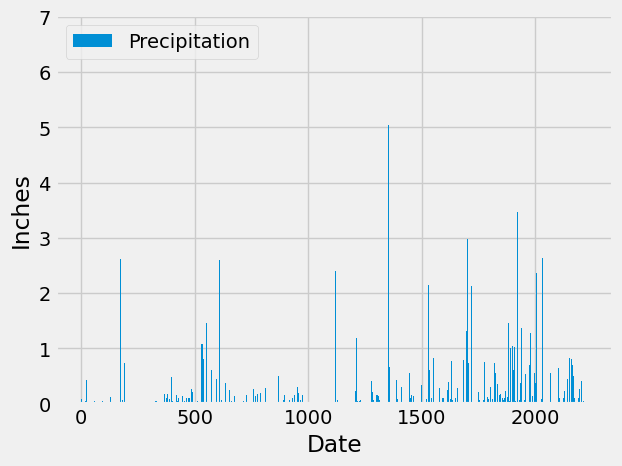

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(lateststr[0], '%Y-%m-%d')

last12 = dt.date(recent_date.year -1, recent_date.month, recent_date.day)# retrieves the last date in the range 

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= last12).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(queryresult, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
precipitation_scores_df = precipitation_scores_df.sort_values(["Date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
x = precipitation_scores_df.index.tolist()
y = precipitation_scores_df['Precipitation'].tolist()
plt.bar(x,y, label = "Precipitation")

plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
plt.show()

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station,func.count(Measurement.id)]
active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
most_active_station

(54.0, 85.0, 71.66378066378067)

In [39]:
station_date = session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()
station_date = dt.datetime.strptime(lateststr[0], '%Y-%m-%d')

year_station_date = dt.date(station_date.year -1, station_date.month, station_date.day)


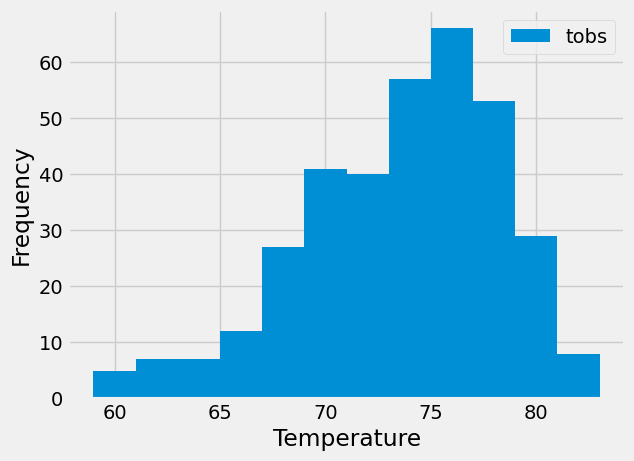

In [42]:
#most_active_station_id = session.query(*sel).group_by(Measurement.id).first()
queryresult = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= year_station_date).all()

temperatures = list(np.ravel(queryresult))

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*sel).all()

#plot histogram
plt.hist(temperatures, bins=12,rwidth=1.0,label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Close Session

In [41]:
# Close Session
session.close()